# CustomerRetentionAnalysis

This project analyzes the differences in customer retention between free and premium users, using a dataset that includes both in-store and mobile orders. It visualizes in an interactive manner the retention rates of users after making a specific number of purchases (X orders) and would be valuable for presenting to potential stakeholders.

In [199]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

## Loading Data

In [200]:
from google.colab import drive
drive.mount('/content/drive')

# Loading data
data = '/content/drive/My Drive/Datasets/user_purchase_data.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Users

In [201]:
users = pd.read_excel(data, 'user_registration')
users.sample(15)

,userID,is_subscriber
41627,41628,No
160126,160127,No
35839,35840,No
112181,112182,No
24980,24981,No
53624,53625,No
172365,172366,No
70504,70505,No
48218,48219,No
68621,68622,No


In [202]:
users.shape

(201217, 2)

In [203]:
users.isna().sum()

,0
userID,0
is_subscriber,0


In [204]:
users[users['userID'].duplicated()].shape[0]

0

In [205]:
users['is_subscriber'].value_counts(dropna=False)

,count
is_subscriber,
No,199633
Yes,1584


### Load Mobile Orders

In [206]:
mobile = pd.read_excel(data, 'mobile_orders')
mobile.sample(15)

,user_id,mobile_orders
12723,18124,2
543,770,4
99803,141915,5
64408,91741,2
139532,198169,31
44880,63975,7
125317,178059,4
64457,91813,23
15125,21580,3
86521,123046,4


In [207]:
mobile.shape

(141690, 2)

In [208]:
mobile.isna().sum()

,0
user_id,0
mobile_orders,0


In [209]:
mobile[mobile['user_id'].duplicated()].shape[0]

0

In [210]:
mobile.dtypes

,0
user_id,int64
mobile_orders,int64


In [211]:
mobile.describe()

,user_id,mobile_orders
count,141690.000000,141690.000000
mean,102032.573915,9.565947
std,58829.041531,24.138480
min,2.000000,1.000000
25%,51088.250000,2.000000
50%,102160.000000,4.000000
75%,153052.750000,8.000000
max,203044.000000,1174.000000


<Axes: ylabel='Frequency'>

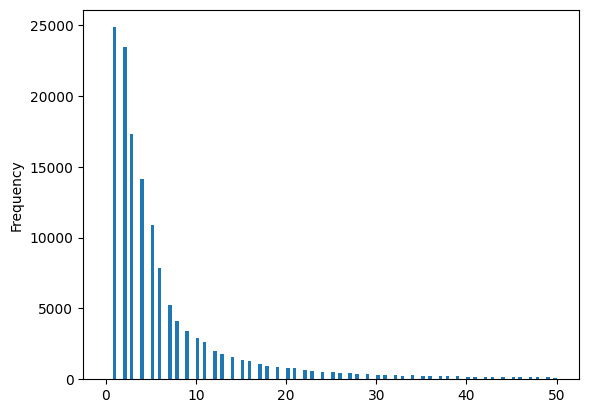

In [212]:
mobile['mobile_orders'].plot(kind='hist', bins=130, range=[0,50])

In [213]:
mobile.loc[~mobile['user_id'].isin(users['userID']), 'user_id'].tolist()

[201218,
 201219,
 201220,
 201221,
 201222,
 201223,
 201224,
 201225,
 201226,
 201227,
 201228,
 201229,
 201230,
 201231,
 201232,
 201233,
 201234,
 201235,
 201236,
 201237,
 201238,
 201239,
 201240,
 201241,
 201242,
 201243,
 201244,
 201245,
 201246,
 201247,
 201248,
 201249,
 201250,
 201251,
 201252,
 201253,
 201254,
 201255,
 201256,
 201257,
 201258,
 201259,
 201260,
 201261,
 201262,
 201263,
 201264,
 201265,
 201266,
 201267,
 201268,
 201269,
 201270,
 201271,
 201272,
 201273,
 201274,
 201275,
 201276,
 201277,
 201278,
 201279,
 201280,
 201281,
 201282,
 201283,
 201284,
 201285,
 201286,
 201287,
 201288,
 201289,
 201290,
 201291,
 201292,
 201293,
 201294,
 201295,
 201296,
 201297,
 201298,
 201299,
 201300,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201313,
 201314,
 201315,
 201316,
 201317,
 201318,
 201319,
 201320,
 201321,
 201322,
 201323,
 201324,
 201325,
 201326,
 201327,
 201328,
 

### Load in-store orders

In [214]:
in_store = pd.read_excel(data, 'in_store_orders')
in_store.sample(15)

,user_id,in_store_orders
41809,158095,1
43751,165593,36
12443,46961,7
44564,168664,33
50819,192058,2
27603,104070,56
30129,113521,2
43887,166191,31
22496,84495,23
11464,43194,1


In [215]:
in_store.shape

(53287, 2)

In [216]:
in_store.isna().sum()

,0
user_id,0
in_store_orders,0


In [217]:
in_store['user_id'].nunique() == in_store.shape[0]

True

In [218]:
in_store.dtypes

,0
user_id,int64
in_store_orders,int64


In [219]:
in_store['in_store_orders'].describe()

,in_store_orders
count,53287.000000
mean,23.849701
std,55.010021
min,1.000000
25%,3.000000
50%,9.000000
75%,24.000000
max,1419.000000


<Axes: ylabel='Frequency'>

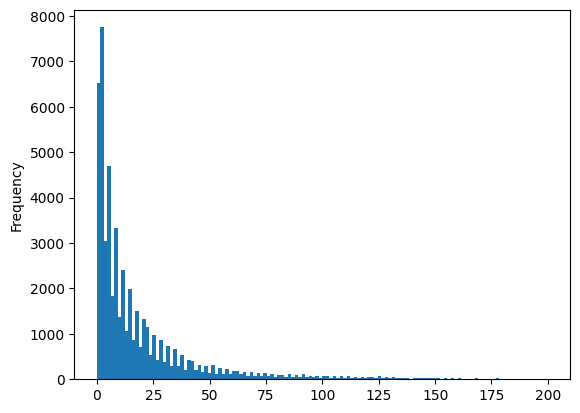

In [220]:
in_store['in_store_orders'].plot(kind='hist', bins=130, range=[0,200])

In [221]:
in_store.loc[~mobile['user_id'].isin(users['userID']), 'user_id'].tolist()

[367,
 201222,
 582,
 1029,
 1199,
 1236,
 1264,
 1351,
 1563,
 1638,
 1726,
 2014,
 2305,
 2468,
 2506,
 2614,
 2793,
 3004,
 3183,
 3231,
 3748,
 3968,
 4268,
 4904,
 5217,
 5670,
 6025,
 6665,
 7110,
 8291,
 8629,
 8741,
 8910,
 9004,
 9291,
 9660,
 10305,
 11404,
 11915,
 12852,
 13127,
 13355,
 14204,
 14478,
 14605,
 14681,
 15833,
 16167,
 16194,
 16254,
 16603,
 17581,
 17759,
 17904,
 19106,
 19150,
 19380,
 19844,
 19879,
 19884,
 20453,
 203166,
 20812,
 21321,
 21398,
 21407,
 21420,
 21845,
 21876,
 22154,
 22289,
 22839,
 23963,
 24845,
 25155,
 25231,
 25675,
 26406,
 26672,
 203203,
 26963,
 27119,
 27211,
 27277,
 27542,
 27877,
 28248,
 28791,
 28960,
 29409,
 29590,
 30527,
 30965,
 31164,
 31225,
 31344,
 31523,
 31605,
 31842,
 32253,
 32621,
 32847,
 32889,
 33116,
 33574,
 33598,
 33646,
 33904,
 34162,
 203240,
 34379,
 34760,
 35279,
 35509,
 35583,
 35893,
 36408,
 36409,
 36465,
 36653,
 37093,
 37464,
 37553,
 37724,
 37878,
 38202,
 38445,
 38644,
 38708,
 

## DataFrame Manipulation

In [222]:
users.rename(columns={'userID':'user_id'}, inplace=True)

In [223]:
users['user_category'] = ['Premium' if i=='Yes' else 'Free' for i in users['is_subscriber'].values]
users.drop(columns='is_subscriber', inplace=True)
users

,user_id,user_category
0,1,Free
1,2,Free
2,3,Free
3,4,Free
4,5,Free
...,...,...
201212,201213,Free
201213,201214,Free
201214,201215,Free
201215,201216,Free


In [224]:
users['user_category'].value_counts()

,count
user_category,
Free,199633
Premium,1584


In [225]:
orders = pd.merge(users, mobile, how='left', on='user_id').merge(in_store, how='left', on='user_id')

In [226]:
orders.isna().sum()

,0
user_id,0
user_category,0
mobile_orders,61354
in_store_orders,149484


In [227]:
for col in orders.columns[2:]:
  orders[col] = orders[col].fillna(0)

orders.head()

,user_id,user_category,mobile_orders,in_store_orders
0,1,Free,0.0,0.0
1,2,Free,5.0,0.0
2,3,Free,0.0,0.0
3,4,Free,2.0,0.0
4,5,Free,5.0,26.0


In [228]:
orders['total_orders'] = orders['mobile_orders'] + orders['in_store_orders']
orders['total_orders'] = orders['total_orders'].astype(int)
orders

,user_id,user_category,mobile_orders,in_store_orders,total_orders
0,1,Free,0.0,0.0,0
1,2,Free,5.0,0.0,5
2,3,Free,0.0,0.0,0
3,4,Free,2.0,0.0,2
4,5,Free,5.0,26.0,31
...,...,...,...,...,...
201212,201213,Free,2.0,0.0,2
201213,201214,Free,0.0,0.0,0
201214,201215,Free,5.0,2.0,7
201215,201216,Free,2.0,0.0,2


In [229]:
orders.drop(columns=['mobile_orders', 'in_store_orders'], inplace=True)

In [230]:
orders['total_orders'].describe()

,total_orders
count,201217.000000
mean,12.952131
std,46.347289
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,2279.000000


In [231]:
cat = 'Premium'
min_orders = 1000

100 * orders[(orders['user_category'] == cat) & (orders['total_orders'] >= min_orders)].shape[0]/(orders['user_category'] == cat).sum()

0.7575757575757576

In [232]:
order_bins = [0,1,2,3,4,5,6,7,8,10,12,15,20,25,30,35,40,45,50,55,60,70,80,90,100,120,140,160,180,200,250,300,350,400,450,500,550,600,700,800,900,1000,1100]

In [233]:
len(order_bins)

43

In [234]:
for order_bin in order_bins:
  orders['orders >= ' + str(order_bin)] = [1 if i >= order_bin else 0 for i in orders['total_orders'].values]

orders

,user_id,user_category,total_orders,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 30,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,1,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201212,201213,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201213,201214,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201214,201215,Free,7,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201215,201216,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [235]:
pd.set_option('display.max_columns', None)
orders.head(10)

,user_id,user_category,total_orders,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 30,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,1,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Free,32,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Free,10,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Free,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [236]:
totals = orders.drop(columns=['user_id', 'total_orders'])
totals.head()

,user_category,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 30,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Free,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Free,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [237]:
totals.columns[1:]

Index(['orders >= 0', 'orders >= 1', 'orders >= 2', 'orders >= 3',
       'orders >= 4', 'orders >= 5', 'orders >= 6', 'orders >= 7',
       'orders >= 8', 'orders >= 10', 'orders >= 12', 'orders >= 15',
       'orders >= 20', 'orders >= 25', 'orders >= 30', 'orders >= 35',
       'orders >= 40', 'orders >= 45', 'orders >= 50', 'orders >= 55',
       'orders >= 60', 'orders >= 70', 'orders >= 80', 'orders >= 90',
       'orders >= 100', 'orders >= 120', 'orders >= 140', 'orders >= 160',
       'orders >= 180', 'orders >= 200', 'orders >= 250', 'orders >= 300',
       'orders >= 350', 'orders >= 400', 'orders >= 450', 'orders >= 500',
       'orders >= 550', 'orders >= 600', 'orders >= 700', 'orders >= 800',
       'orders >= 900', 'orders >= 1000', 'orders >= 1100'],
      dtype='object')

In [238]:
totals = totals.groupby('user_category')[totals.columns[1:]].sum().reset_index()


In [239]:
totals

,user_category,orders >= 0,orders >= 1,orders >= 2,orders >= 3,orders >= 4,orders >= 5,orders >= 6,orders >= 7,orders >= 8,orders >= 10,orders >= 12,orders >= 15,orders >= 20,orders >= 25,orders >= 30,orders >= 35,orders >= 40,orders >= 45,orders >= 50,orders >= 55,orders >= 60,orders >= 70,orders >= 80,orders >= 90,orders >= 100,orders >= 120,orders >= 140,orders >= 160,orders >= 180,orders >= 200,orders >= 250,orders >= 300,orders >= 350,orders >= 400,orders >= 450,orders >= 500,orders >= 550,orders >= 600,orders >= 700,orders >= 800,orders >= 900,orders >= 1000,orders >= 1100
0,Free,199633,150055,127507,105052,88675,76665,66874,59841,54505,46510,40463,34116,26777,21938,18467,15787,13669,11960,10551,9377,8452,6985,5922,5125,4442,3432,2761,2226,1805,1497,952,668,501,377,296,242,205,165,118,86,73,60,50
1,Premium,1584,1271,1162,1089,1032,972,915,863,804,741,692,635,548,489,455,410,380,362,330,317,307,277,257,227,201,171,153,137,113,105,90,73,58,51,45,43,41,37,29,24,19,12,7


In [240]:
graph_df = pd.melt(totals, id_vars='user_category', value_vars=totals.columns[1:],
        var_name='orders_bin', value_name='registered_users')

In [241]:
graph_df['min_orders'] = [int(i.split('>= ')[1]) for i in graph_df['orders_bin'].values]
graph_df.drop(columns='orders_bin', inplace=True)

In [242]:
graph_df

,user_category,registered_users,min_orders
0,Free,199633,0
1,Premium,1584,0
2,Free,150055,1
3,Premium,1271,1
4,Free,127507,2
...,...,...,...
81,Premium,19,900
82,Free,60,1000
83,Premium,12,1000
84,Free,50,1100


In [243]:
baseline = 1 # truest retention

graph_df['category_totals'] = [graph_df.loc[(graph_df['user_category'] == i) &
 (graph_df['min_orders'] == baseline), 'registered_users'].max()
 for i in graph_df['user_category']]

In [244]:
graph_df['%_registered_users'] = graph_df['registered_users']/graph_df['category_totals']

In [245]:
graph_df.drop(columns=['category_totals', 'registered_users'], inplace=True)

In [246]:
graph_df

,user_category,min_orders,%_registered_users
0,Free,0,1.330399
1,Premium,0,1.246263
2,Free,1,1.000000
3,Premium,1,1.000000
4,Free,2,0.849735
...,...,...,...
81,Premium,900,0.014949
82,Free,1000,0.000400
83,Premium,1000,0.009441
84,Free,1100,0.000333


## Data Visualisation

In [247]:
max_x_val = 1100 # change for better analysis (0 - 1100)

fig = go.Figure()

for i in graph_df['user_category'].unique():
    fig.add_trace(go.Scatter(x=graph_df.loc[graph_df['user_category'] == i]['min_orders'],
                             y=graph_df.loc[graph_df['user_category'] == i]['%_registered_users'],
                             name=i + ' Users',
                             hovertemplate='<b>%{y:.2%}</b>'))

fig.update_traces(mode='markers+lines')
fig.update_layout(hovermode='x unified',
                  xaxis_title='Minimum Orders',
                  yaxis_title='% of Users ' + str(baseline) + '+ times',
                  yaxis={'tickformat': ',.0%'},
                  title = {'text':'Retention Curve for Free vs Premium Customers',
                           'y':0.85, 'x':0.5, 'xanchor':'center', 'yanchor':'middle'})

fig.update_xaxes(range = [baseline, max_x_val])
fig.update_yaxes(range = [-0.01, 1.01])

fig.write_html('/content/drive/My Drive/Colab Notebooks/outputs/retention_curve.html')

fig.show()